## Chapter - 6 code

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
seed = 42

### Feature selection using Random forrest

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
iris = datasets.load_iris()

In [4]:
feature_list = iris.feature_names

In [5]:
feature_list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X = iris.data

In [7]:
y = iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [9]:
rf_clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

In [10]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
rf_clf.feature_importances_

array([0.10832699, 0.01528148, 0.44276878, 0.43362275])

In [12]:
for name, score in zip(iris["feature_names"], rf_clf.feature_importances_):
     print(name, score)

sepal length (cm) 0.10832699004803857
sepal width (cm) 0.01528147861272828
petal length (cm) 0.4427687819626719
petal width (cm) 0.43362274937656137


In [13]:
y_pred = rf_clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.9333333333333333

In [14]:
sfm = SelectFromModel(rf_clf, threshold=0.15)

In [15]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=-1,
                                                 oob_score=False,
 

In [16]:
for feature_list_index in sfm.get_support(indices=True):
    print(feature_list[feature_list_index])

petal length (cm)
petal width (cm)


In [17]:
#Create a new dataset with the important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [18]:
rf_clf_important = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
# Train the new classifier on the new dataset containing the most important features
rf_clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = rf_clf_important.predict(X_important_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_important_pred)

0.9166666666666666

### Feature transformations with ensembles of trees
Code inspiration and credit https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

In [19]:
import numpy as np
np.random.seed(seed)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

In [20]:
n_estimator = 100

In [21]:
X, y = make_classification(n_samples=20000)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

X_train, X_train_svc, y_train, y_train_svc = train_test_split(X_train, y_train, test_size=0.3)

In [23]:
# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,random_state=seed)

rt_svc = SVC(kernel='linear',probability=True,random_state=seed)

pipeline = make_pipeline(rt, rt_svc)

pipeline.fit(X_train, y_train)

y_pred_rt = pipeline.predict_proba(X_test)[:, 1]

fpr_rt_svc, tpr_rt_svc, _ = roc_curve(y_test, y_pred_rt)

In [24]:
#supervised transformation using random forest
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)

rf_enc = OneHotEncoder()

rf_svc = SVC(kernel='linear',probability=True,random_state=seed)

rf.fit(X_train, y_train)

rf_enc.fit(rf.apply(X_train))

rf_svc.fit(rf_enc.transform(rf.apply(X_train_svc)), y_train_svc)


y_pred_rf_svc = rf_svc.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]

fpr_rf_svc, tpr_rf_svc, _ = roc_curve(y_test, y_pred_rf_svc)


In [25]:
# Supervised transformation based on gradient boosted trees
grd_clf = GradientBoostingClassifier(n_estimators=n_estimator)

grd_enc = OneHotEncoder()

grd_svc = SVC(kernel='linear',probability=True,random_state=seed)

grd_clf.fit(X_train, y_train)

grd_enc.fit(grd_clf.apply(X_train)[:, :, 0])

grd_svc.fit(grd_enc.transform(grd_clf.apply(X_train_svc)[:, :, 0]), y_train_svc)

y_pred_grd_svc = grd_svc.predict_proba(
    grd_enc.transform(grd_clf.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_svc, tpr_grd_svc, _ = roc_curve(y_test, y_pred_grd_svc)

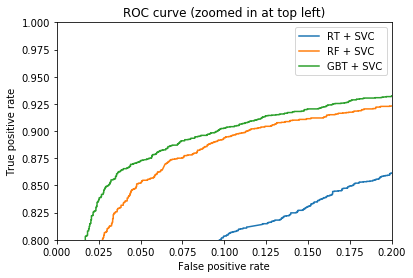

In [26]:
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_svc, tpr_rt_svc, label='RT + SVC')
plt.plot(fpr_rf_svc, tpr_rf_svc, label='RF + SVC')
plt.plot(fpr_grd_svc, tpr_grd_svc, label='GBT + SVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

### Building a pre-processing pipeline for Random Forest classifier

In [50]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from pprint import pprint

In [51]:
#import sklearn
#print(sklearn.__version__)
# Must be greater than 0.22.2

In [52]:
np.random.seed(0)
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
pclass       1309 non-null float64
name         1309 non-null object
sex          1309 non-null category
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null category
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


In [54]:
X['pclass'].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [55]:
X['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [56]:
X['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [57]:
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [58]:
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [59]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [60]:
rnd_clf = RandomForestClassifier(n_estimators=188,n_jobs=-1)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rnd_clf)])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.809


In [64]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}
pprint(grid)

{'classifier__bootstrap': [True, False],
 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'classifier__max_features': ['auto', 'sqrt'],
 'classifier__min_samples_leaf': [1, 2, 4],
 'classifier__min_samples_split': [2, 5, 10],
 'classifier__n_estimators': [100, 122, 144, 166, 188, 211, 233, 255, 277, 300]}


In [65]:
#grid = {'classifier__n_estimators': n_estimators}

In [66]:
search = GridSearchCV(estimator = clf,param_grid = grid, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
search.fit(X_train, y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [67]:
print(search.best_params_)

{'classifier__bootstrap': False, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 122}


In [68]:
print("Grid search model score: %.3f" % search.score(X_test, y_test))

Grid search model score: 0.813


### IsolationForest

Code inspiration and credit - https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [70]:
%matplotlib inline

In [73]:
rng = np.random.RandomState(seed)

In [74]:
# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

In [75]:
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

In [76]:
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [77]:
# fit the model
if_clf = IsolationForest(max_samples=100, random_state=rng)
if_clf.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None, random_state=RandomState(MT19937) at 0x1A1DC165A0,
                verbose=0, warm_start=False)

In [78]:
y_pred_train = if_clf.predict(X_train)
y_pred_test = if_clf.predict(X_test)
y_pred_outliers = if_clf.predict(X_outliers)

In [79]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = if_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

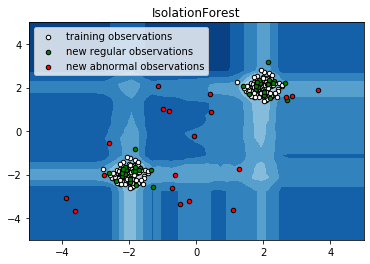

In [80]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

### Pre-processing with Dask

In [81]:
from dask_ml.preprocessing import Categorizer, DummyEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import pandas as pd
import dask.dataframe as dd

In [82]:
df = pd.DataFrame({"A": [1, 2, 1, 2], "B": ["a", "b", "c", "c"]})
X = dd.from_pandas(df, npartitions=2)
y = dd.from_pandas(pd.Series([0, 1, 1, 0]), npartitions=2)

pipe = make_pipeline(
   Categorizer(),
   DummyEncoder(),
   RandomForestClassifier()
)

In [83]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('categorizer', Categorizer(categories=None, columns=None)),
                ('dummyencoder', DummyEncoder(columns=None, drop_first=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verb

#### Ensemble fitting

In [84]:
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
import dask_ml.datasets
from dask_ml.wrappers import ParallelPostFit

In [85]:
X, y = datasets.make_classification(n_samples=1000, random_state=0)
clf = ParallelPostFit(estimator=GradientBoostingClassifier(),
                       scoring='accuracy')

In [86]:
clf.fit(X, y)

ParallelPostFit(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                     criterion='friedman_mse',
                                                     init=None,
                                                     learning_rate=0.1,
                                                     loss='deviance',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                               

In [87]:
clf.classes_

array([0, 1])

In [88]:
X_big, y_big = dask_ml.datasets.make_classification(n_samples=100000,chunks=25,
                                                        random_state=0)

In [89]:
clf.predict(X_big)

,Array,Chunk
Bytes,800.00 kB,200 B
Shape,"(100000,)","(25,)"
Count,8000 Tasks,4000 Chunks
Type,int64,numpy.ndarray


#### Use Voting Classifiers

In [90]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import sklearn.datasets

In [91]:
X, y = sklearn.datasets.make_classification(n_samples=1_000, n_features=20)

In [92]:
classifiers = [
    ('sgd', SGDClassifier(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(gamma='auto')),
]

In [93]:
clf = VotingClassifier(classifiers, n_jobs=-1)

In [94]:
import joblib
from distributed import Client

client = Client()
client

Client Scheduler: tcp://127.0.0.1:51930 Dashboard: http://127.0.0.1:51931/status,Cluster Workers: 4 Cores: 12 Memory: 17.18 GB


In [95]:
with joblib.parallel_backend("dask"):
    clf.fit(X, y)

print(clf)

VotingClassifier(estimators=[('sgd',
                              SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=None, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=...
                                                     oob_score=False,
                                          